# USAID-Kenya-Sentiment-Analysis

#    Merging Reddit CSV Files

### Import neccessary libraries

In [1]:
import pandas as pd
import glob
import os


### Folder path

In [2]:
folder_path = 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/reddit_data'


### CSV file paths

In [3]:
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
csv_files

['C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/reddit_data\\Agatha_reddit.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/reddit_data\\cecilia.redditsubs.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/reddit_data\\cecilia.reddit_nbo_ke_africa.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/reddit_data\\leo_reddit_posts.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/reddit_data\\Mbego_reddit_usaid_kenya.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/reddit_data\\Mbego_reddit_usaid_kenya2.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/reddit_data\\reddit_usaid_kenya.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/reddit_data\\reddit_usaid_sentiment.csv',
 'C:/Users/hp/Deskto

### Reading the files and combining them into one dataframe

In [4]:

preferred_columns = ['post_title', 'text', 'keyword', 'published_date', 'url']
all_dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    
    # Rename common column variants
    if 'title' in df.columns:
        df.rename(columns={'title': 'post_title'}, inplace=True)
    if 'selftext' in df.columns and 'text' not in df.columns:
        df.rename(columns={'selftext': 'text'}, inplace=True)
    if 'date_posted' in df.columns:
        df.rename(columns={'date_posted': 'published_date'}, inplace=True)
    elif 'created_utc' in df.columns:
        df.rename(columns={'created_utc': 'published_date'}, inplace=True)
    
    # Add missing columns
    for col in preferred_columns:
        if col not in df.columns:
            df[col] = None

    # Convert published_date to datetime
    df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

    # Track file source
    df['source_file'] = os.path.basename(file)
    
    # Keep only standardized columns
    df = df[preferred_columns + ['source_file']]

    all_dfs.append(df)

# Combine all
combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df.head()


,post_title,text,keyword,published_date,url,source_file
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,usaid kenya,2025-04-15 13:16:53,https://www.reddit.com/r/Kenya/comments/1jzrn2...,Agatha_reddit.csv
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,usaid kenya,2025-04-07 04:21:12,https://www.reddit.com/r/Kenya/comments/1jtcvb...,Agatha_reddit.csv
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,usaid kenya,2025-04-05 19:09:10,https://www.reddit.com/r/Kenya/comments/1jsb14...,Agatha_reddit.csv
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",usaid kenya,2025-03-25 08:18:04,https://www.reddit.com/r/Kenya/comments/1jjehw...,Agatha_reddit.csv
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,usaid kenya,2025-03-08 08:08:58,https://www.reddit.com/r/Kenya/comments/1j6cjz...,Agatha_reddit.csv


In [5]:
combined_df.shape #check the shape of the dataset

(1306, 6)

In [6]:
combined_df.isna().sum() #check for missing values

post_title          0
text              398
keyword           564
published_date    197
url                 0
source_file         0
dtype: int64

In [7]:
combined_df.columns

Index(['post_title', 'text', 'keyword', 'published_date', 'url',
       'source_file'],
      dtype='object')

In [8]:
# Extract date and time
combined_df['time'] = combined_df['published_date'].dt.time
combined_df['published_date'] = combined_df['published_date'].dt.date

#Drop the time column
combined_df.drop(columns='time', inplace=True)
combined_df.head()

,post_title,text,keyword,published_date,url,source_file
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,usaid kenya,2025-04-15,https://www.reddit.com/r/Kenya/comments/1jzrn2...,Agatha_reddit.csv
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,usaid kenya,2025-04-07,https://www.reddit.com/r/Kenya/comments/1jtcvb...,Agatha_reddit.csv
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,usaid kenya,2025-04-05,https://www.reddit.com/r/Kenya/comments/1jsb14...,Agatha_reddit.csv
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",usaid kenya,2025-03-25,https://www.reddit.com/r/Kenya/comments/1jjehw...,Agatha_reddit.csv
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,usaid kenya,2025-03-08,https://www.reddit.com/r/Kenya/comments/1j6cjz...,Agatha_reddit.csv


In [9]:
combined_df.sample(10) #random sample of 10 rows

,post_title,text,keyword,published_date,url,source_file
785,A Short Story.,"In Medicine, there's something called physical...",None,1970-01-01,https://www.reddit.com/r/Kenya/comments/1jqspe...,leo_reddit_posts.csv
521,Title: I grew up idolizing France. Now I see t...,I want to believe we still have what it takes—...,"foreign aid, foreign aid",2025-05-12,https://www.reddit.com/r/Africa/comments/1kknb...,cecilia.redditsubs.csv
283,Is the Kenyan Digital Nomad Visa Official Yet?,"Friends, I've been seeing conflicting informat...",development aid kenya,2025-02-24,https://www.reddit.com/r/Kenya/comments/1iwvya...,Agatha_reddit.csv
850,Looking for Temporary Market Researchers in Na...,"Hey Reddit fam, \r\nIn regard to [this](https...",None,1970-01-01,https://www.reddit.com/r/Kenya/comments/1jv12r...,leo_reddit_posts.csv
271,🤔 What If Kenya Allowed British Rule Beyond 19...,Hear me out: The white man stayed past 1963. I...,development aid kenya,2025-03-19,https://www.reddit.com/r/Kenya/comments/1jeqhx...,Agatha_reddit.csv
563,Pete Marocco Returns to Battle in Trump’s War ...,NaN,"foreign aid, foreign aid",2025-02-18,https://www.nytimes.com/2025/02/18/us/politics...,cecilia.redditsubs.csv
770,Government money circlejerk,Government taxes your payslip to build house y...,None,1970-01-01,https://i.redd.it/g2f4uxrslj5f1.jpeg,leo_reddit_posts.csv
337,Why are we playing so safe?,I recently came across a group of guys online ...,kenya donor funding,2025-04-12,https://www.reddit.com/r/Kenya/comments/1jx7it...,Agatha_reddit.csv
34,Karibu na mzuri! A day in the life of a job se...,Sijui niite bahati ama kuponea chupu chupu. N...,usaid budget cut,2025-02-07,https://www.reddit.com/r/Kenya/comments/1ijn7s...,Agatha_reddit.csv
960,World Health Organization warns of possible tu...,NaN,None,NaT,https://www.nbcnews.com/health/health-news/tub...,Mbego_reddit_usaid_kenya2.csv


### Save the final merged dataframe to csv

In [10]:
# Save to CSV 
if not combined_df.empty:
    output_filename = "C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/processed/individual datasets/Cecilia_merged_reddit_dataset.csv"
    combined_df.to_csv(output_filename, index=False, encoding='utf-8')
    print(f" Results successfully saved to:\n{output_filename}")
else:
    print(" No data to save. The DataFrame is empty.")


 Results successfully saved to:
C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/processed/individual datasets/Cecilia_merged_reddit_dataset.csv


# Merging News CSV Files

### Import necessary libraries

In [11]:
import pandas as pd
import glob
import os


### Folder path

In [12]:
folder_path = 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/news_data'


### CSV file paths

In [13]:
folder_path = 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/news_data'
omit_file = os.path.join(folder_path, 'Agatha_news_fulltext.csv')

news_csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
news_csv_files = [f for f in news_csv_files if os.path.normpath(f) != os.path.normpath(omit_file)]

news_csv_files


['C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/news_data\\Agatha_news.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/news_data\\cecilia.newsapi.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/news_data\\leo_newsapi_articles_enriched.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/news_data\\Mbego_news_usaid_kenya_fulltext.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/news_data\\Mbego_news_usaid_kenya_recent.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/news_data\\newsapi_usaid_articles.csv',
 'C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/news_data\\ruth_news.csv']

### Reading the files and combining them into one dataframe

In [14]:
import pandas as pd
import os

news_columns = ['title', 'description', 'text', 'url', 'keyword', 'published_date', 'source_file']
all_news_dfs = []

for file in news_csv_files:  
    df = pd.read_csv(file)

    # Rename content to text 
    if 'content' in df.columns and 'text' not in df.columns:
        df.rename(columns={'content': 'text'}, inplace=True)

    # Rename publishedAt to published_date
    if 'publishedAt' in df.columns:
        df.rename(columns={'publishedAt': 'published_date'}, inplace=True)

    # Add missing columns
    for col in news_columns:
        if col not in df.columns:
            df[col] = None

    # Convert published_date to datetime
    df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')



    # source file info
    df['source_file'] = os.path.basename(file)

    # standardized columns
    df = df[news_columns]
    all_news_dfs.append(df)

# Combine all
news_combined_df = pd.concat(all_news_dfs, ignore_index=True)

# Save to CSV
output_path = "C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/processed/individual datasets/Cecilia_merged_news_dataset.csv"
if not news_combined_df.empty:
    news_combined_df.to_csv(output_path, index=False, encoding='utf-8')
    print(f"NewsAPI data saved to:\n{output_path}")
else:
    print("No NewsAPI data to save. DataFrame is empty.")


NewsAPI data saved to:
C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/processed/individual datasets/Cecilia_merged_news_dataset.csv


In [15]:
news_combined_df.shape

(2638, 7)

In [16]:
news_combined_df.sample(10)

,title,description,text,url,keyword,published_date,source_file
1759,Trump Team Set To Destroy $12M In USAID Contra...,What rotten human beings these MAGats are. Via...,The mandate that [the USAID negotiator] has be...,https://crooksandliars.com/2025/06/trump-team-...,USAID money,2025-06-08 19:03:49+00:00,cecilia.newsapi.csv
923,The Surprisingly Radical History of Father’s Day,Father’s Day’s origins as a national holiday a...,Fathers Day can sometimes seem like an afterth...,https://time.com/7293189/fathers-day-radical-h...,aid budget,2025-06-13 11:00:00+00:00,cecilia.newsapi.csv
417,Government struggles to slash foreign aid spen...,The government is struggling to cut the billio...,The government is struggling to cut the billio...,https://news.sky.com/story/government-struggle...,foreign aid cut,2025-06-07 11:25:00+00:00,Agatha_news.csv
1485,All the ways the Trump administration is going...,"In seeking to reshape elite universities, the ...",A federal judge has once again stepped in to b...,https://www.npr.org/2025/06/10/nx-s1-5424450/w...,USAID funding,2025-06-10 09:00:00+00:00,cecilia.newsapi.csv
1721,"Elon Musk Says Trump’s ‘Big, Beautiful’ Bill ‘...",The billionaire presidential adviser said he w...,"Elon Musk, the billionaire tech mogul who had ...",https://time.com/7289045/musk-trump-big-beauti...,Trump cuts,2025-05-28 06:00:00+00:00,cecilia.newsapi.csv
1372,China is now the biggest debt collector in the...,"Developing countries owe billions to China, wh...",China has dramatically curtailed its lending i...,https://www.npr.org/2025/05/28/nx-s1-5413239/c...,Africa aid,2025-05-28 17:23:43+00:00,cecilia.newsapi.csv
2625,Has DOGE really saved the US government $180bn?,Elon Musk first claimed the department would m...,President Donald Trump and adviser Elon Musk c...,https://www.aljazeera.com/news/2025/6/6/has-do...,None,2025-06-06 11:21:51+00:00,ruth_news.csv
880,Education Department Budget Request Includes M...,The 2026 budget request for the U.S. Departmen...,Just adding a little flexibility here.\r\ngett...,https://www.forbes.com/sites/petergreene/2025/...,funding cuts,2025-05-31 03:27:22+00:00,cecilia.newsapi.csv
2026,Ethical concerns a barrier to use of AI tools ...,A new report has revealed that fundraisers hav...,A new report has revealed that fundraisers hav...,https://phys.org/news/2025-06-ethical-barrier-...,donors,2025-06-23 15:20:03+00:00,cecilia.newsapi.csv
1316,The Brief: The real problem with Weber’s anti-...,It's time to rethink the role of “civil societ...,Today's edition is powered by The Internationa...,https://www.euractiv.com/section/politics/opin...,NGO funding,2025-06-19 16:08:20+00:00,cecilia.newsapi.csv


In [17]:
news_combined_df.isna().sum()

title               0
description        16
text               25
url                 2
keyword           259
published_date     99
source_file         0
dtype: int64

## FINAL REDDIT DATA TO BE USED ~ mbego_all_reddit_merged

In [18]:
import pandas as pd
import seaborn as sns

In [19]:
reddit_df = pd.read_csv('C:/Users/hp/Desktop/USAID backuppp for me/mbego_all_reddit_merged.csv')
reddit_df.head()

,title,selftext,subreddit,author,created_utc,created_date,score,num_comments,keyword,search_term,date_posted,upvotes,comments,url,permalink
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,Kenya,muerki,4/15/2025 13:16,NaN,3.0,5.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1jzrn2...,NaN
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,Kenya,Morio_anzenza,4/7/2025 4:21,NaN,169.0,95.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1jtcvb...,NaN
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,Kenya,vindtar,4/5/2025 19:09,NaN,2.0,2.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1jsb14...,NaN
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",Kenya,Gold_Smart,3/25/2025 8:18,NaN,13.0,20.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1jjehw...,NaN
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,Kenya,westmaxia,3/8/2025 8:08,NaN,1.0,6.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1j6cjz...,NaN


In [20]:
reddit_df.tail()

,title,selftext,subreddit,author,created_utc,created_date,score,num_comments,keyword,search_term,date_posted,upvotes,comments,url,permalink
1284,Weekly Sub-Saharan Africa Security Situation a...,#Somalia 🇸🇴\r\n#Sudan 🇸🇩\r\nDemocratic Republi...,Africa,NaN,4/18/2025 14:09,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,https://open.substack.com/pub/hasretkargin/p/w...,NaN
1285,No evidence that Burkina Faso paid off all its...,NaN,Africa,NaN,4/18/2025 8:23,NaN,52.0,25.0,NaN,NaN,NaN,NaN,NaN,https://www.reuters.com/fact-check/burkina-fas...,NaN
1286,Ghana orders foreigners to exit gold market by...,Ghana has ordered foreigners to exit its gold ...,Africa,NaN,4/17/2025 17:59,NaN,101.0,12.0,NaN,NaN,NaN,NaN,NaN,https://eastleighvoice.co.ke/west%20african/13...,NaN
1287,Unending Frustration Regarding Sudan War.,https://www.reuters.com/world/britain-boosts-a...,Africa,NaN,4/16/2025 19:33,NaN,11.0,8.0,NaN,NaN,NaN,NaN,NaN,https://www.reddit.com/gallery/1k0t8ed,NaN
1288,Tanzania's Authoritarian Government Has Just B...,Tanzania's main opposition party has been barr...,Africa,NaN,4/14/2025 11:31,NaN,52.0,14.0,NaN,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Africa/comments/1jywl...,NaN


In [21]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1289 non-null   object 
 1   selftext      901 non-null    object 
 2   subreddit     1289 non-null   object 
 3   author        466 non-null    object 
 4   created_utc   1289 non-null   object 
 5   created_date  150 non-null    object 
 6   score         1013 non-null   float64
 7   num_comments  833 non-null    float64
 8   keyword       742 non-null    object 
 9   search_term   150 non-null    object 
 10  date_posted   0 non-null      float64
 11  upvotes       276 non-null    float64
 12  comments      276 non-null    float64
 13  url           1289 non-null   object 
 14  permalink     426 non-null    object 
dtypes: float64(5), object(10)
memory usage: 151.2+ KB


In [22]:
reddit_df.shape

(1289, 15)

In [23]:
reddit_df.columns

Index(['title', 'selftext', 'subreddit', 'author', 'created_utc',
       'created_date', 'score', 'num_comments', 'keyword', 'search_term',
       'date_posted', 'upvotes', 'comments', 'url', 'permalink'],
      dtype='object')

In [24]:
reddit_df.dtypes

title            object
selftext         object
subreddit        object
author           object
created_utc      object
created_date     object
score           float64
num_comments    float64
keyword          object
search_term      object
date_posted     float64
upvotes         float64
comments        float64
url              object
permalink        object
dtype: object

In [25]:
reddit_df.isna().sum()

title              0
selftext         388
subreddit          0
author           823
created_utc        0
created_date    1139
score            276
num_comments     456
keyword          547
search_term     1139
date_posted     1289
upvotes         1013
comments        1013
url                0
permalink        863
dtype: int64

In [26]:
reddit_df.describe()

,score,num_comments,date_posted,upvotes,comments
count,1013.000000,833.000000,0.0,276.000000,276.000000
mean,344.626851,31.349340,NaN,337.518116,35.905797
std,3106.309319,68.060435,NaN,1623.914761,73.531775
min,0.000000,0.000000,NaN,0.000000,0.000000
25%,3.000000,4.000000,NaN,6.750000,5.000000
50%,10.000000,9.000000,NaN,43.500000,13.000000
75%,54.000000,31.000000,NaN,111.250000,31.250000
max,79088.000000,706.000000,NaN,22208.000000,558.000000


## Data Cleaning

### Dropping Unneccessary Columns

In [27]:
reddit_df.drop(columns=['subreddit', 'author','created_date','score','num_comments','search_term','date_posted','upvotes','comments','permalink'], inplace=True)
reddit_df.head()

,title,selftext,created_utc,keyword,url
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,4/15/2025 13:16,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jzrn2...
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,4/7/2025 4:21,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jtcvb...
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,4/5/2025 19:09,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jsb14...
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",3/25/2025 8:18,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jjehw...
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,3/8/2025 8:08,usaid kenya,https://www.reddit.com/r/Kenya/comments/1j6cjz...


In [28]:
reddit_df.columns

Index(['title', 'selftext', 'created_utc', 'keyword', 'url'], dtype='object')

### Checking for missing values

In [29]:
reddit_df.isna().sum()

title            0
selftext       388
created_utc      0
keyword        547
url              0
dtype: int64

In [30]:
reddit_df[['selftext', 'title','url']].sample(10)

,selftext,title,url
575,This is the message we need to get out to ever...,"In 2017, 120 former US military leaders sent a...",http://www.usglc.org/downloads/2017/02/FY18_In...
1048,NaN,Hong Kong's last major pro-democracy party mov...,https://www.reuters.com/world/china/hong-kongs...
762,"CALL ME WHATEVER YOU WANT, BUT HERE'S THE BARE...","Like It or Not, Here's Why Ruto Will Win in 20...",https://www.reddit.com/r/Kenya/comments/1k3ijd...
11,For the experts in matters economy and finance...,Economy,https://www.reddit.com/r/Kenya/comments/1jsyty...
386,Since America has decided to go back to being ...,Marshall Plan Equivalent,https://www.reddit.com/r/Africa/comments/1jx7y...
980,NaN,UK hoping to work with China to counteract Tru...,https://www.theguardian.com/environment/2025/m...
1090,"Kenyans, it’s time to quit Jaba or Khat (Miraa...","Jaba, Khat, Miraa, Muguka, Qat, it’s time to q...",https://www.reddit.com/gallery/1leqfhr
1235,I’ve been thinking about something deeply pers...,Why are Black boys still being forced to cut t...,https://www.reddit.com/r/Africa/comments/1ksxl...
655,NaN,"Judge again orders US to unfreeze foreign aid,...",https://www.reuters.com/world/us/judge-again-o...
143,"Hi everyone, \r\nI'm a US citizen currently...",Advice Needed: Issue with Scrap Metal Trader i...,https://www.reddit.com/r/Kenya/comments/1kfbkt...


In [31]:
reddit_df.rename(columns={'title':'post_title','selftext':'text','created_utc':'published_date'},inplace=True)
reddit_df.head()

,post_title,text,published_date,keyword,url
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,4/15/2025 13:16,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jzrn2...
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,4/7/2025 4:21,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jtcvb...
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,4/5/2025 19:09,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jsb14...
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",3/25/2025 8:18,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jjehw...
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,3/8/2025 8:08,usaid kenya,https://www.reddit.com/r/Kenya/comments/1j6cjz...


**parse** - analyze and convert a piece of data (like a string) into a different, more useful format.

The below code cleans the published_date column in the data. Some dates are written as normal dates (eg "2025-04-15") and others are written as numbers (UNIX timestamps). The code checks each value and tries to convert it into a proper date. If it can’t, it leaves it empty. After that, it removes the time part and keeps just the date. This helps make sure all the dates are in the same clean format.

In [32]:
import pandas as pd

# Function to handle both datetime strings and UNIX timestamps
def parse_mixed_dates(val):
    try:
        # Parse as a regular datetime string
        return pd.to_datetime(val)
    except:
        try:
            # Parse as a UNIX timestamp
            return pd.to_datetime(float(val), unit='s')
        except:
            return pd.NaT  # Return NaT if all parsing fails

# Apply the parsing function
reddit_df['published_date'] = reddit_df['published_date'].apply(parse_mixed_dates)

# Check how many dates failed to parse
print("Unparsed dates:", reddit_df['published_date'].isna().sum())

# Extract date only (remove time)
reddit_df['published_date'] = reddit_df['published_date'].dt.date
reddit_df.head()

Unparsed dates: 0


,post_title,text,published_date,keyword,url
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,2025-04-15,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jzrn2...
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,2025-04-07,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jtcvb...
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,2025-04-05,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jsb14...
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",2025-03-25,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jjehw...
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,2025-03-08,usaid kenya,https://www.reddit.com/r/Kenya/comments/1j6cjz...


In [33]:
reddit_df['published_date'].isna().sum() #check the missing values in date

0

In [34]:
reddit_df.dropna(subset=['published_date'], inplace=True) #drop missing values in date

In [35]:
reddit_df.shape #check the shape of the dataset

(1289, 5)

In [36]:
reddit_df.isna().sum() #check for missing values

post_title          0
text              388
published_date      0
keyword           547
url                 0
dtype: int64

### Fill missing values in text with an empty string

I filled missing values in text with an empty string because these are likely link posts where the author did not add body text.

In [37]:
reddit_df['text'] = reddit_df['text'].fillna('')
reddit_df.isna().sum()

post_title          0
text                0
published_date      0
keyword           547
url                 0
dtype: int64

### Fill missing values in keyword with a placeholder 'Unknown'

In [38]:
reddit_df['keyword'] = reddit_df['keyword'].fillna('unknown')
reddit_df['keyword'].sample(10)

658     foreign aid, foreign aid
1262                     unknown
1071                     unknown
473                        USAID
464      usaid suspended funding
744                      unknown
508                        USAID
169      usaid kenya funding cut
529     foreign aid, foreign aid
164      usaid kenya funding cut
Name: keyword, dtype: object

In [39]:
reddit_df.isna().sum()

post_title        0
text              0
published_date    0
keyword           0
url               0
dtype: int64

Missing values filled with an empty string and placeholder to maintain the integrity of the data and maintain a good amount of rows

### Check for duplicates 

In [40]:
reddit_df.duplicated().sum()

145

In [41]:
reddit_df.drop_duplicates(inplace=True) #drop all duplicates

In [42]:
reddit_df.duplicated().sum() #confirm that all duplicates have been dropped

0

In [43]:
reddit_df.shape #shape of the new data after cleaning

(1144, 5)

In [44]:
reddit_df['post_title'].sample(10)

145     Have the recent world occurrences exposed how ...
126     Abortion in Kenya: A Clash of Policies, Cultur...
536     Canada calls USAID shutdown a ‘dangerous retre...
444     Canadian universities report jump in US applic...
49                                           Rugby Jersey
1189    Uber drivers rant, not rating anything above 3...
857                           Hehehehe the day I ran away
365                      Will Mogadishu Collapse in 2025?
647     Chief Justice John Roberts pauses order for Tr...
1174                                      Kenya's Defense
Name: post_title, dtype: object

## Sentiment Analysis Cleaning

Creating a new column 'full_text' that combines 'post_title','text' and the empty string '', to help in sentiment analysis

In [45]:
reddit_df['full_text'] = reddit_df['post_title'] + ' ' + reddit_df['text']
reddit_df.head() #sample top 5 rows after combining the columns

,post_title,text,published_date,keyword,url,full_text
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,2025-04-15,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jzrn2...,"USAID left a month ago, do we have ARVs in Ken..."
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,2025-04-07,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jtcvb...,Classism in r/Kenya and r/nairobi The classism...
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,2025-04-05,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jsb14...,EX-USAID people!! Let's talk Are you still in ...
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",2025-03-25,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jjehw...,Why western powers back Israel no matter what ...
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,2025-03-08,usaid kenya,https://www.reddit.com/r/Kenya/comments/1j6cjz...,Is kenya capable of funding its needs now that...


In [46]:
reddit_df['full_text'].isna().sum() #confirm that there are no missing values in the dataset

0

### Lowercasing 

Converting all text to lowercase

In [47]:
reddit_df['full_text'] = reddit_df['full_text'].str.lower()
reddit_df['full_text'].sample(10)

70      how do people safely date and meet new people?...
256     techies in kenya hey tech nerds,\r\n\r\ni’m so...
52      urgent!! i’m 21f\r\n\r\nboth my parents are fo...
1155    looking to get connections hello fam, it's bee...
201     trump/ the republicans are not guessing he is ...
276     library reddit just throwing this subreddit ou...
280     kenya’s economic reality: why fighting corrupt...
463     ukraine secures preliminary deals to replace u...
415     nigerian lawmakers probe usaid-funded non-prof...
772     remember vision 2030? man, nilikuwa like 10 ye...
Name: full_text, dtype: object

### Translate all text to English

In [48]:
!pip install langdetect #detect which language the text are in


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#detect': Expected package name at the start of dependency specifier
    #detect
    ^


In [49]:
from langdetect import detect

# Language detection
reddit_df['language'] = reddit_df['full_text'].apply(lambda x: detect(x) if pd.notnull(x) else 'unknown')
reddit_df['language'].value_counts()

en    1127
sw       5
tl       3
et       3
fr       2
sl       1
da       1
es       1
id       1
Name: language, dtype: int64

In [50]:
# View full text rows where the language is not English
non_english_df = reddit_df[reddit_df['language'] != 'en']

# Display the full_text column of non-English rows
print(non_english_df[['language', 'full_text']])


     language                                          full_text
28         tl  ...na bado mnasema ruto must go bila tangible ...
175        tl  ...na bado mnasema ruto must go bila tangible ...
236        sl                                design job nairobi 
273        tl  ...na bado mnasema ruto must go bila tangible ...
301        et  just seeing ki, sa, che, ko, la, si...pure tri...
634        fr  supreme court rules trump administration must ...
638        fr  supreme court denies trump administration requ...
664        da  judge orders us to restore funds for foreign a...
852        sw  "wapi mtoto?" it was always an escape for me d...
853        sw  drunk and orderly it so happened that one time...
943        et                            joblessness is looming 
1054       et  s.korea, us, japan hold 1st trilateral working...
1061       es     chaos erupts as caravan reaches mexico border 
1100       id  filling kra returns at ksh 35 usitikie kupata ...
1140       sw  most kenya

In [51]:
! pip install deep-translator #Translates text from one language to another



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#Translates': Expected package name at the start of dependency specifier
    #Translates
    ^


In [52]:
from deep_translator import GoogleTranslator

# Make a copy of non-English rows
non_english_df = reddit_df[reddit_df['language'] != 'en'].copy()

# Translate each full_text
non_english_df['translated_text'] = non_english_df['full_text'].apply(
    lambda text: GoogleTranslator(source='auto', target='en').translate(text)
)

# Preview translations
print(non_english_df[['language', 'full_text', 'translated_text']].head())


    language                                          full_text  \
28        tl  ...na bado mnasema ruto must go bila tangible ...   
175       tl  ...na bado mnasema ruto must go bila tangible ...   
236       sl                                design job nairobi    
273       tl  ...na bado mnasema ruto must go bila tangible ...   
301       et  just seeing ki, sa, che, ko, la, si...pure tri...   

                                       translated_text  
28   ... and you still say Ruto must go without tan...  
175  ... and you still say Ruto must go without tan...  
236                                 design job nairobi  
273  ... and you still say Ruto must go without tan...  
301  just seeing ki, sa, che, ko, la, si ... pure t...  


From the above preview, shows that the text with both english and swahili was able to be translated as shown in index 28

In [53]:
reddit_df['language'].value_counts() #check which other languages have been detected

en    1127
sw       5
tl       3
et       3
fr       2
sl       1
da       1
es       1
id       1
Name: language, dtype: int64

In [54]:
# Drop all non-English rows
reddit_df = reddit_df[reddit_df['language'] == 'en'].copy()

# Reset the index
reddit_df.reset_index(drop=True, inplace=True)

# Preview the cleaned data
print(reddit_df[['language', 'full_text']].head())


  language                                          full_text
0       en  usaid left a month ago, do we have arvs in ken...
1       en  classism in r/kenya and r/nairobi the classism...
2       en  ex-usaid people!! let's talk are you still in ...
3       en  why western powers back israel no matter what ...
4       en  is kenya capable of funding its needs now that...


In [55]:
reddit_df['language'].value_counts() #confirm that all rows are in English only

en    1127
Name: language, dtype: int64

In [56]:
reddit_df.sample(10)

,post_title,text,published_date,keyword,url,full_text,language
990,kenyan justice system,"Lemme rant manze , this Albert story really br...",2025-06-13,unknown,https://www.reddit.com/r/Kenya/comments/1lakow...,"kenyan justice system lemme rant manze , this ...",en
973,Opportunity in cybersecurity,Last time I asked this nobody responded but I'...,2025-06-15,unknown,https://www.reddit.com/r/Kenya/comments/1lcciu...,opportunity in cybersecurity last time i asked...,en
729,"Kenyan comfort food - ugali, nyama na sukuma w...","\r\nI swear anytime anywhere, nyama ugali and ...",2025-05-28,unknown,https://www.reddit.com/r/Kenya/comments/1kxgbt...,"kenyan comfort food - ugali, nyama na sukuma w...",en
105,Interesting report on what's limiting African ...,It points to market frictions; a lack of regio...,2025-01-26,kenya foreign aid,https://www.reddit.com/r/Kenya/comments/1iahzi...,interesting report on what's limiting african ...,en
18,"""USAID was helping pay nurses' salaries.""",I have seen this claim being thrown around cas...,2025-02-05,usaid funding,https://www.reddit.com/r/Kenya/comments/1ii7yw...,"""usaid was helping pay nurses' salaries."" i ha...",en
833,"Remaining USAID staff fired, Trump says Myanma...",,2025-03-29,unknown,https://www.reuters.com/world/us/state-departm...,"remaining usaid staff fired, trump says myanma...",en
960,"Random Acts of Kindness, kuna conductor wazuri...","Hi cousins, hamjambo jamani! Kabla tuendelee W...",2025-06-17,unknown,https://www.reddit.com/r/Kenya/comments/1ldg5y...,"random acts of kindness, kuna conductor wazuri...",en
31,These seven African countries will be hit the ...,,2025-02-12,usaid budget cut,https://www.semafor.com/article/02/12/2025/cou...,these seven african countries will be hit the ...,en
632,US food purchases for foreign aid halted despi...,,2025-02-08,"foreign aid, foreign aid",https://www.reuters.com/markets/commodities/us...,us food purchases for foreign aid halted despi...,en
161,Scammer alert : I hope I am wrong about this,I came across this post on here and I was quit...,2025-04-04,usaid kenya funding cut,https://www.reddit.com/gallery/1jrlxvb,scammer alert : i hope i am wrong about this i...,en


In [57]:
reddit_df.drop('language', axis=1, inplace=True) #drop the language column as it is unnecessary now
reddit_df.head()

,post_title,text,published_date,keyword,url,full_text
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,2025-04-15,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jzrn2...,"usaid left a month ago, do we have arvs in ken..."
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,2025-04-07,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jtcvb...,classism in r/kenya and r/nairobi the classism...
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,2025-04-05,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jsb14...,ex-usaid people!! let's talk are you still in ...
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",2025-03-25,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jjehw...,why western powers back israel no matter what ...
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,2025-03-08,usaid kenya,https://www.reddit.com/r/Kenya/comments/1j6cjz...,is kenya capable of funding its needs now that...


In [58]:
reddit_df.shape

(1127, 6)

### Removing Punctuation Marks

In [59]:
import re
import string

# Function to remove punctuation
def remove_punctuation(text):
    return re.sub(f"[{re.escape(string.punctuation)}]", "", str(text))

# Apply to the 'full_text' column
reddit_df['full_text'] = reddit_df['full_text'].apply(remove_punctuation)

reddit_df.head()


,post_title,text,published_date,keyword,url,full_text
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,2025-04-15,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jzrn2...,usaid left a month ago do we have arvs in keny...
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,2025-04-07,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jtcvb...,classism in rkenya and rnairobi the classism i...
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,2025-04-05,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jsb14...,exusaid people lets talk are you still in cont...
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",2025-03-25,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jjehw...,why western powers back israel no matter what ...
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,2025-03-08,usaid kenya,https://www.reddit.com/r/Kenya/comments/1j6cjz...,is kenya capable of funding its needs now that...


### Removing Stop Words,Emojis,Non-Emoji Symbols and Lemmatization

In [60]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to remove emojis, emoticons, and other symbols
def remove_emojis_symbols(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002700-\U000027BF"  # dingbats
        u"\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
        u"\U0001FA70-\U0001FAFF"  # extended pictographic symbols
        u"\U00002500-\U00002BEF"  # misc symbols
        u"\U0000200D"             # zero width joiner
        u"\u2600-\u26FF"          # misc symbols
        u"\u2700-\u27BF"
        u"\uFE0F"                 # variation selector
        u"\u3030"
        u"\u00A9"                 # ©
        u"\u00AE"                 # ®
        u"\u2122"                 # ™
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Final cleaning function
def clean_text(text):
    text = remove_emojis_symbols(text)
    words = text.split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Apply to reddit_df
reddit_df['cleaned_text'] = reddit_df['full_text'].apply(clean_text)

# Preview sample
reddit_df.sample(10)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,post_title,text,published_date,keyword,url,full_text,cleaned_text
541,February 5 Foreign Aid Rally in DC - updated w...,https://www.usaidstopwork.com/rallyinformation...,2025-02-04,"USAID, foreign aid, foreign aid",https://i.redd.it/8tn24iuit0he1.jpeg,february 5 foreign aid rally in dc updated wi...,february 5 foreign aid rally dc updated confir...
1056,"Doctors on strike, Ethiopian government on the...","On average, doctors in Ethiopia earn just $80 ...",2025-06-11,unknown,https://continent.substack.com/p/doctors-on-st...,doctors on strike ethiopian government on the ...,doctor strike ethiopian government attack aver...
1018,Marrying at 72,"Someone said their mom got married at 72, i do...",2025-06-11,unknown,https://www.reddit.com/r/Kenya/comments/1l8rbz...,marrying at 72 someone said their mom got marr...,marrying 72 someone said mom got married 72 kn...
749,The Bare Minimum SGR Experience,"As a frequent user of the SGR, it’s hard not t...",2025-04-06,unknown,https://www.reddit.com/r/Kenya/comments/1jt0or...,the bare minimum sgr experience as a frequent ...,bare minimum sgr experience frequent user sgr ...
234,Racism - how often do you as a Kenyan feel rac...,I have lived half of my life in Kenya. I've ju...,2025-05-19,development aid kenya,https://www.reddit.com/r/Kenya/comments/1kq6n2...,racism how often do you as a kenyan feel raci...,racism often kenyan feel racially attacked liv...
907,"Cisco Systems, and the U.S. Agency for Interna...",,2011-10-14,unknown,http://en.rian.ru/russia/20111014/167702989.html,cisco systems and the us agency for internatio...,cisco system u agency international developmen...
126,You gotta go!!,This is it. It’s been 6 days since you slept a...,2025-05-25,usaid kenya funding cut,https://www.reddit.com/r/Kenya/comments/1kuwrw...,you gotta go this is it it’s been 6 days since...,gotta go it’s 6 day since slept home work kept...
122,The Star today,Eh!,2025-05-27,usaid kenya funding cut,https://i.redd.it/j5ws7z3sfa3f1.jpeg,the star today eh,star today eh
515,"State Department issues immediate, widespread ...",,2025-01-24,"foreign aid, foreign aid",https://www.politico.com/news/2025/01/24/state...,state department issues immediate widespread p...,state department issue immediate widespread pa...
782,World Health Organization warns of possible tu...,,2025-03-16,unknown,https://www.nbcnews.com/health/health-news/tub...,world health organization warns of possible tu...,world health organization warns possible tuber...


In [61]:
reddit_df.iloc[268]['cleaned_text']


'kenya allowed british rule beyond 1963 let’s talk hear white man stayed past 1963 it’s controversial thought begs question—how would kenya look today allowed british govern u year would developed south africa vibrant hong kong can’t help wonder truly ready independence honestly strongly believe weren’t—and maybe still aren’t freedom premature move let brit continue pulling string sake development i’m opening floor debate convince otherwise good people let’s talk kenya history development freedomdebate'

In [62]:
reddit_df.iloc[268]['full_text']


'🤔 what if kenya allowed british rule beyond 1963 let’s talk about it hear me out the white man stayed past 1963 it’s a controversial thought but it begs the question—how would kenya look today if we allowed the british to govern us for a few more years would we be as developed as south africa or as vibrant as hong kong  \r\n\r\ni can’t help but wonder if we were truly ready for independence honestly i strongly believe we weren’t—and maybe still aren’t was freedom a premature move should we have let the brits continue pulling the strings for the sake of development  \r\n\r\ni’m opening the floor for debate convince me otherwise good people let’s talk 🧐 kenya history development freedomdebate'

### Tokenization

In [63]:
import nltk
from nltk.tokenize import word_tokenize

# Download tokenizer data 
nltk.download('punkt')

#  tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Apply to cleaned text
reddit_df['tokens'] = reddit_df['cleaned_text'].apply(tokenize_text)

# display the first 5 rows
reddit_df[['cleaned_text', 'tokens']].head()
reddit_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,post_title,text,published_date,keyword,url,full_text,cleaned_text,tokens
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,2025-04-15,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jzrn2...,usaid left a month ago do we have arvs in keny...,usaid left month ago arvs kenya someone differ...,"[usaid, left, month, ago, arvs, kenya, someone..."
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,2025-04-07,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jtcvb...,classism in rkenya and rnairobi the classism i...,classism rkenya rnairobi classism im seeing su...,"[classism, rkenya, rnairobi, classism, im, see..."
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,2025-04-05,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jsb14...,exusaid people lets talk are you still in cont...,exusaid people let talk still contact organisa...,"[exusaid, people, let, talk, still, contact, o..."
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",2025-03-25,usaid kenya,https://www.reddit.com/r/Kenya/comments/1jjehw...,why western powers back israel no matter what ...,western power back israel matter kenya avoid u...,"[western, power, back, israel, matter, kenya, ..."
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,2025-03-08,usaid kenya,https://www.reddit.com/r/Kenya/comments/1j6cjz...,is kenya capable of funding its needs now that...,kenya capable funding need usaid disbanded ken...,"[kenya, capable, funding, need, usaid, disband..."


## FINAL NEWS DATA TO BE USED ~ Cecilia_merged_news_dataset

In [64]:
import pandas as pd
import seaborn as sns

In [65]:
news_df = pd.read_csv('C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/processed/individual datasets/Cecilia_merged_news_dataset.csv')
news_df.head()

,title,description,text,url,keyword,published_date,source_file
0,Has DOGE really saved the US government $180bn?,Elon Musk first claimed the department would m...,President Donald Trump and adviser Elon Musk c...,https://www.aljazeera.com/news/2025/6/6/has-do...,usaid kenya,2025-06-06 11:21:51+00:00,Agatha_news.csv
1,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...,https://cleantechnica.com/2025/05/26/the-life-...,usaid kenya,2025-05-26 17:13:41+00:00,Agatha_news.csv
2,"Death, Sexual Violence and Human Trafficking: ...",by Brett Murphy and Anna Maria Barry-Jester \n...,ProPublica is a nonprofit newsroom that invest...,https://www.propublica.org/article/trump-usaid...,usaid kenya,2025-05-28 18:45:00+00:00,Agatha_news.csv
3,Congress Should Quickly Approve Trump’s Rescis...,President Donald Trump‘s rescission legislatio...,President Donald Trumps rescission legislation...,https://www.dailysignal.com/2025/06/10/congres...,usaid kenya,2025-06-10 12:00:00+00:00,Agatha_news.csv
4,Food Safety Depends On Every Link In The Suppl...,Almost 1 in 10 people globally fall ill from c...,Colorful fish and vegetables can be purchased ...,https://www.forbes.com/sites/daniellenierenber...,usaid kenya,2025-06-06 13:55:41+00:00,Agatha_news.csv


In [66]:
news_df.tail()

,title,description,text,url,keyword,published_date,source_file
2633,"Death, Sexual Violence and Human Trafficking: ...",by Brett Murphy and Anna Maria Barry-Jester \r...,ProPublica is a nonprofit newsroom that invest...,https://www.propublica.org/article/trump-usaid...,NaN,2025-05-28 18:45:00+00:00,ruth_news.csv
2634,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...,https://cleantechnica.com/2025/05/26/the-life-...,NaN,2025-05-26 17:13:41+00:00,ruth_news.csv
2635,Stakeholders’ perspectives on the status of fa...,Introduction Facility- and community-based dif...,Abstract\r\nIntroduction\r\nFacility- and comm...,https://journals.plos.org/plosone/article?id=1...,NaN,2025-05-22 14:00:00+00:00,ruth_news.csv
2636,"Africa Needs More Renewables, So Why Is It Inv...",Sub-Saharan Africa has an energy funding deficit.,"LICHTENBURG, SOUTH AFRICA - MAY 8: A man is se...",https://www.forbes.com/sites/sverrealvik/2025/...,NaN,2025-05-20 09:57:16+00:00,ruth_news.csv
2637,May 2025 Updates,Every month we send an email newsletter to our...,Every month we send an email newsletter to our...,https://blog.givewell.org/2025/05/19/may-2025-...,NaN,2025-05-19 19:26:41+00:00,ruth_news.csv


In [67]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2638 entries, 0 to 2637
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2638 non-null   object
 1   description     2622 non-null   object
 2   text            2613 non-null   object
 3   url             2636 non-null   object
 4   keyword         2379 non-null   object
 5   published_date  2539 non-null   object
 6   source_file     2638 non-null   object
dtypes: object(7)
memory usage: 144.4+ KB


In [68]:
news_df.shape

(2638, 7)

In [69]:
news_df.columns

Index(['title', 'description', 'text', 'url', 'keyword', 'published_date',
       'source_file'],
      dtype='object')

In [70]:
news_df.dtypes

title             object
description       object
text              object
url               object
keyword           object
published_date    object
source_file       object
dtype: object

In [71]:
news_df.isna().sum()

title               0
description        16
text               25
url                 2
keyword           259
published_date     99
source_file         0
dtype: int64

In [72]:
news_df.describe()

,title,description,text,url,keyword,published_date,source_file
count,2638,2622,2613,2636,2379,2539,2638
unique,1453,1457,1445,1486,30,1341,7
top,"Death, Sexual Violence and Human Trafficking: ...",Elon Musk first claimed the department would m...,ProPublica is a nonprofit newsroom that invest...,https://www.propublica.org/article/trump-usaid...,foreign aid,2025-05-28 18:45:00+00:00,cecilia.newsapi.csv
freq,23,22,22,23,196,23,1787


## Data Cleaning

### Feature Engineering

##### Create column 'time' from 'published_date'

In [73]:
# Convert published_date to datetime format
news_df['published_date'] = pd.to_datetime(news_df['published_date'])

# Extract time into a new column 'time'
news_df['time'] = news_df['published_date'].dt.time

# Keep only the date (drop the time) in published_date
news_df['published_date'] = news_df['published_date'].dt.date

# Preview
news_df.head()


,title,description,text,url,keyword,published_date,source_file,time
0,Has DOGE really saved the US government $180bn?,Elon Musk first claimed the department would m...,President Donald Trump and adviser Elon Musk c...,https://www.aljazeera.com/news/2025/6/6/has-do...,usaid kenya,2025-06-06,Agatha_news.csv,11:21:51
1,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...,https://cleantechnica.com/2025/05/26/the-life-...,usaid kenya,2025-05-26,Agatha_news.csv,17:13:41
2,"Death, Sexual Violence and Human Trafficking: ...",by Brett Murphy and Anna Maria Barry-Jester \n...,ProPublica is a nonprofit newsroom that invest...,https://www.propublica.org/article/trump-usaid...,usaid kenya,2025-05-28,Agatha_news.csv,18:45:00
3,Congress Should Quickly Approve Trump’s Rescis...,President Donald Trump‘s rescission legislatio...,President Donald Trumps rescission legislation...,https://www.dailysignal.com/2025/06/10/congres...,usaid kenya,2025-06-10,Agatha_news.csv,12:00:00
4,Food Safety Depends On Every Link In The Suppl...,Almost 1 in 10 people globally fall ill from c...,Colorful fish and vegetables can be purchased ...,https://www.forbes.com/sites/daniellenierenber...,usaid kenya,2025-06-06,Agatha_news.csv,13:55:41


### Dropping Unneccessary Columns

In [74]:
news_df.drop(columns=['source_file', 'time'], inplace=True)
news_df.head()


,title,description,text,url,keyword,published_date
0,Has DOGE really saved the US government $180bn?,Elon Musk first claimed the department would m...,President Donald Trump and adviser Elon Musk c...,https://www.aljazeera.com/news/2025/6/6/has-do...,usaid kenya,2025-06-06
1,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...,https://cleantechnica.com/2025/05/26/the-life-...,usaid kenya,2025-05-26
2,"Death, Sexual Violence and Human Trafficking: ...",by Brett Murphy and Anna Maria Barry-Jester \n...,ProPublica is a nonprofit newsroom that invest...,https://www.propublica.org/article/trump-usaid...,usaid kenya,2025-05-28
3,Congress Should Quickly Approve Trump’s Rescis...,President Donald Trump‘s rescission legislatio...,President Donald Trumps rescission legislation...,https://www.dailysignal.com/2025/06/10/congres...,usaid kenya,2025-06-10
4,Food Safety Depends On Every Link In The Suppl...,Almost 1 in 10 people globally fall ill from c...,Colorful fish and vegetables can be purchased ...,https://www.forbes.com/sites/daniellenierenber...,usaid kenya,2025-06-06


### Checking for missing values

In [75]:
news_df.isna().sum() #check for missing values

title               0
description        16
text               25
url                 2
keyword           259
published_date     99
dtype: int64

In [76]:
# Fill columns with placeholders and empty string
news_df['description'].fillna(' ', inplace=True)
news_df['text'].fillna(' ', inplace=True)

# Drop rows where url, keyword or published_date is missing
news_df.dropna(subset=['url', 'published_date','keyword'], inplace=True)


In [77]:
news_df.isna().sum() #confirm that there are no more missing values and data has been cleaned well

title             0
description       0
text              0
url               0
keyword           0
published_date    0
dtype: int64

In [78]:
news_df.shape #check the shape of the data after dealing with missing values. 
#there is still a good amount of data left, since only around 300 rows were dropped.

(2379, 6)

### Check for duplicates

In [79]:
news_df.duplicated().sum() #check the number of uplicates in the data

98

#### Drop duplicates

In [80]:
news_df.drop_duplicates(inplace=True) #drop the duplicates

In [81]:
news_df.duplicated().sum() #confirm that all duplicates have been dropped, and the data is clean

0

In [82]:
news_df.shape #check the new shape of the data

(2281, 6)

## Sentiment Analysis Cleaning

### Feature Engineering

Creating a new column 'full_text' byy combining 'title', 'description', 'text' columns and the empty strings used in filling na

In [83]:
news_df['full_text'] = news_df['title'] + ' ' + news_df['description'] + news_df['text']
news_df.iloc[4]['full_text']  #sample check for row number 5

'Food Safety Depends On Every Link In The Supply Chain Almost 1 in 10 people globally fall ill from contaminated food every year. Making our food supply safer for communities depends on everyone.Colorful fish and vegetables can be purchased at a public market.\r\ngetty\r\nFor communities to be nourished, their food supply must be safe to eat.\r\nThis sounds obvious, but its worth repeating, becaus… [+4445 chars]'

### Lowercasing

Converting all text to lowercase

In [84]:
news_df['full_text'] = news_df['full_text'].str.lower()
news_df.iloc[4]['full_text'] #sample check for row number 5 and confirm that all text has been lowercased

'food safety depends on every link in the supply chain almost 1 in 10 people globally fall ill from contaminated food every year. making our food supply safer for communities depends on everyone.colorful fish and vegetables can be purchased at a public market.\r\ngetty\r\nfor communities to be nourished, their food supply must be safe to eat.\r\nthis sounds obvious, but its worth repeating, becaus… [+4445 chars]'

Cleaning the text and remove \r\n, backslashes \, and any similar unwanted characters

In [85]:
# Remove \r, \n, and backslashes from the 'text' column
news_df['full_text'] = news_df['full_text'].str.replace(r'\r', ' ', regex=True)
news_df['full_text'] = news_df['full_text'].str.replace(r'\n', ' ', regex=True)
news_df['full_text'] = news_df['full_text'].str.replace(r'\\', '', regex=True)


In [86]:
news_df.iloc[4]['full_text']

'food safety depends on every link in the supply chain almost 1 in 10 people globally fall ill from contaminated food every year. making our food supply safer for communities depends on everyone.colorful fish and vegetables can be purchased at a public market.  getty  for communities to be nourished, their food supply must be safe to eat.  this sounds obvious, but its worth repeating, becaus… [+4445 chars]'

### Translate all text to English

In [87]:
from langdetect import detect

# Language detection, detect what language the 'full_text' is in
news_df['language'] = news_df['full_text'].apply(lambda x: detect(x) if pd.notnull(x) else 'unknown')
news_df['language'].value_counts() 
#from the output, all 2281 rows are in English, so there is no need for translation to English

en    2281
Name: language, dtype: int64

### Removing Punctuation Marks

In [88]:
import re
import string

# Function to remove punctuation
def remove_punctuation(text):
    return re.sub(f"[{re.escape(string.punctuation)}]", "", str(text))

# Apply to the 'full_text' column
news_df['full_text'] = news_df['full_text'].apply(remove_punctuation)

news_df.iloc[4]['full_text'] #using column 5 as an example to see whether all punctuation marks have been removed and from my observation, all punctuation marks have been removed


'food safety depends on every link in the supply chain almost 1 in 10 people globally fall ill from contaminated food every year making our food supply safer for communities depends on everyonecolorful fish and vegetables can be purchased at a public market  getty  for communities to be nourished their food supply must be safe to eat  this sounds obvious but its worth repeating becaus… 4445 chars'

### Removing Stop Words,Emojis,Non-Emoji Symbols and Lemmatization

Removes emojis and special symbols – Eliminates non-textual elements to reduce noise.

Removes stopwords – Discards common words with little meaning to focus on key terms.

Lemmatizes words – Converts words to their base forms for standardization.


In [89]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to remove emojis, emoticons, and other symbols
def remove_emojis_symbols(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002700-\U000027BF"  # dingbats
        u"\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
        u"\U0001FA70-\U0001FAFF"  # extended pictographic symbols
        u"\U00002500-\U00002BEF"  # misc symbols
        u"\U0000200D"             # zero width joiner
        u"\u2600-\u26FF"          # misc symbols
        u"\u2700-\u27BF"
        u"\uFE0F"                 # variation selector
        u"\u3030"
        u"\u00A9"                 # ©
        u"\u00AE"                 # ®
        u"\u2122"                 # ™
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Final cleaning function
def clean_text(text):
    text = remove_emojis_symbols(text)
    words = text.split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Apply to news_df
news_df['cleaned_text'] = news_df['full_text'].apply(clean_text) #Stores cleaned text in a new column – Preserves original data while saving processed output.

# Preview sample
news_df.iloc[4]['cleaned_text']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'food safety depends every link supply chain almost 1 10 people globally fall ill contaminated food every year making food supply safer community depends everyonecolorful fish vegetable purchased public market getty community nourished food supply must safe eat sound obvious worth repeating becaus… 4445 char'

## Tokenization

In [90]:
import nltk
from nltk.tokenize import word_tokenize

# Download tokenizer data 
nltk.download('punkt')

#  tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Apply to cleaned text
news_df['tokens'] = news_df['cleaned_text'].apply(tokenize_text)

# display row number 11
news_df[['cleaned_text', 'tokens']].head()
news_df.iloc[10]['cleaned_text']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'may 2025 update every month send email newsletter supporter sharing recent update work publish selected portion newsletter blog make news accessible people visit website key update latest insta…every month send email newsletter supporter sharing recent update work publish selected portion newsletter blog make news accessible people … 3507 char'

In [91]:
news_df.iloc[10]['tokens']

['may',
 '2025',
 'update',
 'every',
 'month',
 'send',
 'email',
 'newsletter',
 'supporter',
 'sharing',
 'recent',
 'update',
 'work',
 'publish',
 'selected',
 'portion',
 'newsletter',
 'blog',
 'make',
 'news',
 'accessible',
 'people',
 'visit',
 'website',
 'key',
 'update',
 'latest',
 'insta…every',
 'month',
 'send',
 'email',
 'newsletter',
 'supporter',
 'sharing',
 'recent',
 'update',
 'work',
 'publish',
 'selected',
 'portion',
 'newsletter',
 'blog',
 'make',
 'news',
 'accessible',
 'people',
 '…',
 '3507',
 'char']

This code below cleans tokens by:

Removing numbers and words like 'char'/'chars',

Splitting truncated words containing ellipses (e.g., "insta...every" → ["insta", "every"]),

Keeping only clean, meaningful tokens while preserving their order, ensuring it remains readable

In [92]:
def clean_tokens(tokens):
    """Remove unwanted tokens including numbers, 'char(s)', and truncated words"""
    cleaned = []
    for token in tokens:
        # Skip numbers, 'char'/'chars', and standalone ellipses
        if token.isdigit() or token in {'char', 'chars', '…'}:
            continue
        # Fix words with ellipses (e.g., 'insta…every' → 'insta', 'every')
        if '…' in token:
            parts = [p for p in token.split('…') if p]
            cleaned.extend(parts)
        else:
            cleaned.append(token)
    return cleaned

# Apply to tokens
news_df['cleaned_tokens'] = news_df['tokens'].apply(clean_tokens)

# Preview
print(news_df.iloc[10]['cleaned_tokens'])

['may', 'update', 'every', 'month', 'send', 'email', 'newsletter', 'supporter', 'sharing', 'recent', 'update', 'work', 'publish', 'selected', 'portion', 'newsletter', 'blog', 'make', 'news', 'accessible', 'people', 'visit', 'website', 'key', 'update', 'latest', 'insta', 'every', 'month', 'send', 'email', 'newsletter', 'supporter', 'sharing', 'recent', 'update', 'work', 'publish', 'selected', 'portion', 'newsletter', 'blog', 'make', 'news', 'accessible', 'people']


This code below cleans already tokenized text by:

Removing numbers and words like 'char'/'chars',

Splitting truncated words containing ellipses (e.g., "insta...every" → ["insta", "every"]),

Keeping only clean, meaningful tokens while preserving their order, ensuring it remains readable

In [93]:
import re

def clean_full_text(text):
    """
    Clean raw text by:
    1. Removing [NNN chars] or NNN chars patterns
    2. Fixing words with ellipses (insta…every → insta every)
    3. Removing standalone numbers and 'char'/'chars'
    4. Removing standalone ellipses
    """
    # Remove char count patterns
    text = re.sub(r"\[\+\d+\s*chars\]|\d+\s*chars", "", text)
    
    # Fix words with ellipses by replacing … with space
    text = re.sub(r"(\w)…(\w)", r"\1 \2", text)
    
    # Remove standalone numbers, 'char', 'chars'
    text = ' '.join(
        word for word in text.split() 
        if not (word.isdigit() or word in {'char', 'chars'})
    )
    
    # Remove any remaining standalone ellipses
    text = text.replace('…', '')
    
    return text.strip()

# Apply to full text column
news_df['cleaned_text'] = news_df['full_text'].apply(clean_full_text)

# Preview before/after
print("Original:", news_df.iloc[10]['full_text'])
print("Cleaned:", news_df.iloc[10]['cleaned_text'])

Original: may 2025 updates every month we send an email newsletter to our supporters sharing recent updates from our work we publish selected portions of the newsletter on our blog to make this news more accessible to people who visit our website for key updates from the latest insta…every month we send an email newsletter to our supporters sharing recent updates from our work we publish selected portions of the newsletter on our blog to make this news more accessible to people … 3507 chars
Cleaned: may updates every month we send an email newsletter to our supporters sharing recent updates from our work we publish selected portions of the newsletter on our blog to make this news more accessible to people who visit our website for key updates from the latest insta every month we send an email newsletter to our supporters sharing recent updates from our work we publish selected portions of the newsletter on our blog to make this news more accessible to people


In [94]:
news_df.head()

,title,description,text,url,keyword,published_date,full_text,language,cleaned_text,tokens,cleaned_tokens
0,Has DOGE really saved the US government $180bn?,Elon Musk first claimed the department would m...,President Donald Trump and adviser Elon Musk c...,https://www.aljazeera.com/news/2025/6/6/has-do...,usaid kenya,2025-06-06,has doge really saved the us government 180bn ...,en,has doge really saved the us government 180bn ...,"[doge, really, saved, u, government, 180bn, el...","[doge, really, saved, u, government, 180bn, el..."
1,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...,https://cleantechnica.com/2025/05/26/the-life-...,usaid kenya,2025-05-26,the life story of ecomobilus technologies limi...,en,the life story of ecomobilus technologies limi...,"[life, story, ecomobilus, technology, limited,...","[life, story, ecomobilus, technology, limited,..."
2,"Death, Sexual Violence and Human Trafficking: ...",by Brett Murphy and Anna Maria Barry-Jester \n...,ProPublica is a nonprofit newsroom that invest...,https://www.propublica.org/article/trump-usaid...,usaid kenya,2025-05-28,death sexual violence and human trafficking fa...,en,death sexual violence and human trafficking fa...,"[death, sexual, violence, human, trafficking, ...","[death, sexual, violence, human, trafficking, ..."
3,Congress Should Quickly Approve Trump’s Rescis...,President Donald Trump‘s rescission legislatio...,President Donald Trumps rescission legislation...,https://www.dailysignal.com/2025/06/10/congres...,usaid kenya,2025-06-10,congress should quickly approve trump’s rescis...,en,congress should quickly approve trump’s rescis...,"[congress, quickly, approve, trump, ’, s, resc...","[congress, quickly, approve, trump, ’, s, resc..."
4,Food Safety Depends On Every Link In The Suppl...,Almost 1 in 10 people globally fall ill from c...,Colorful fish and vegetables can be purchased ...,https://www.forbes.com/sites/daniellenierenber...,usaid kenya,2025-06-06,food safety depends on every link in the suppl...,en,food safety depends on every link in the suppl...,"[food, safety, depends, every, link, supply, c...","[food, safety, depends, every, link, supply, c..."


### Dropping columns ~ language, tokens

In [95]:
news_df.drop(columns=['language','tokens'],inplace=True)
news_df.head()

,title,description,text,url,keyword,published_date,full_text,cleaned_text,cleaned_tokens
0,Has DOGE really saved the US government $180bn?,Elon Musk first claimed the department would m...,President Donald Trump and adviser Elon Musk c...,https://www.aljazeera.com/news/2025/6/6/has-do...,usaid kenya,2025-06-06,has doge really saved the us government 180bn ...,has doge really saved the us government 180bn ...,"[doge, really, saved, u, government, 180bn, el..."
1,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...,https://cleantechnica.com/2025/05/26/the-life-...,usaid kenya,2025-05-26,the life story of ecomobilus technologies limi...,the life story of ecomobilus technologies limi...,"[life, story, ecomobilus, technology, limited,..."
2,"Death, Sexual Violence and Human Trafficking: ...",by Brett Murphy and Anna Maria Barry-Jester \n...,ProPublica is a nonprofit newsroom that invest...,https://www.propublica.org/article/trump-usaid...,usaid kenya,2025-05-28,death sexual violence and human trafficking fa...,death sexual violence and human trafficking fa...,"[death, sexual, violence, human, trafficking, ..."
3,Congress Should Quickly Approve Trump’s Rescis...,President Donald Trump‘s rescission legislatio...,President Donald Trumps rescission legislation...,https://www.dailysignal.com/2025/06/10/congres...,usaid kenya,2025-06-10,congress should quickly approve trump’s rescis...,congress should quickly approve trump’s rescis...,"[congress, quickly, approve, trump, ’, s, resc..."
4,Food Safety Depends On Every Link In The Suppl...,Almost 1 in 10 people globally fall ill from c...,Colorful fish and vegetables can be purchased ...,https://www.forbes.com/sites/daniellenierenber...,usaid kenya,2025-06-06,food safety depends on every link in the suppl...,food safety depends on every link in the suppl...,"[food, safety, depends, every, link, supply, c..."


In [96]:
news_df.iloc[10]['cleaned_tokens']

['may',
 'update',
 'every',
 'month',
 'send',
 'email',
 'newsletter',
 'supporter',
 'sharing',
 'recent',
 'update',
 'work',
 'publish',
 'selected',
 'portion',
 'newsletter',
 'blog',
 'make',
 'news',
 'accessible',
 'people',
 'visit',
 'website',
 'key',
 'update',
 'latest',
 'insta',
 'every',
 'month',
 'send',
 'email',
 'newsletter',
 'supporter',
 'sharing',
 'recent',
 'update',
 'work',
 'publish',
 'selected',
 'portion',
 'newsletter',
 'blog',
 'make',
 'news',
 'accessible',
 'people']

In [97]:
news_df.shape

(2281, 9)

## Exploratory Data Analysis

### 1. Basic Structure & Distribution

### Count of records per source (Reddit vs News).

Reddit records: 1127
News records: 2281


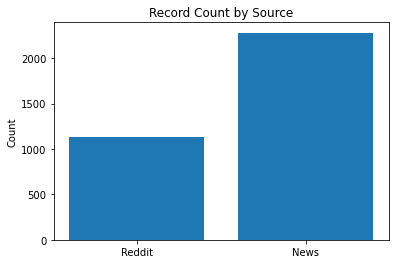

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Reddit records: {len(reddit_df)}")
print(f"News records: {len(news_df)}")

#Plot as bar chart
plt.bar(['Reddit', 'News'], [len(reddit_df), len(news_df)])
plt.title('Record Count by Source')
plt.ylabel('Count')
plt.show()

### Posting frequency over time

In [99]:
#Confirm dates are in datetime format
reddit_df['published_date'] = pd.to_datetime(reddit_df['published_date'])
news_df['published_date'] = pd.to_datetime(news_df['published_date'])

In [100]:
#Add 'source' column to each
reddit_df['source'] = 'Reddit'
news_df['source'] = 'News'


In [101]:
#Combine both datasets
import pandas as pd

combined_df = pd.concat([reddit_df, news_df], ignore_index=True)

# Filter for 2025 data
combined_df = combined_df[combined_df['published_date'].dt.year == 2025] #because we are focusing on the year Trump announced the USAID budget cuts


#### Daily Posting Frequency

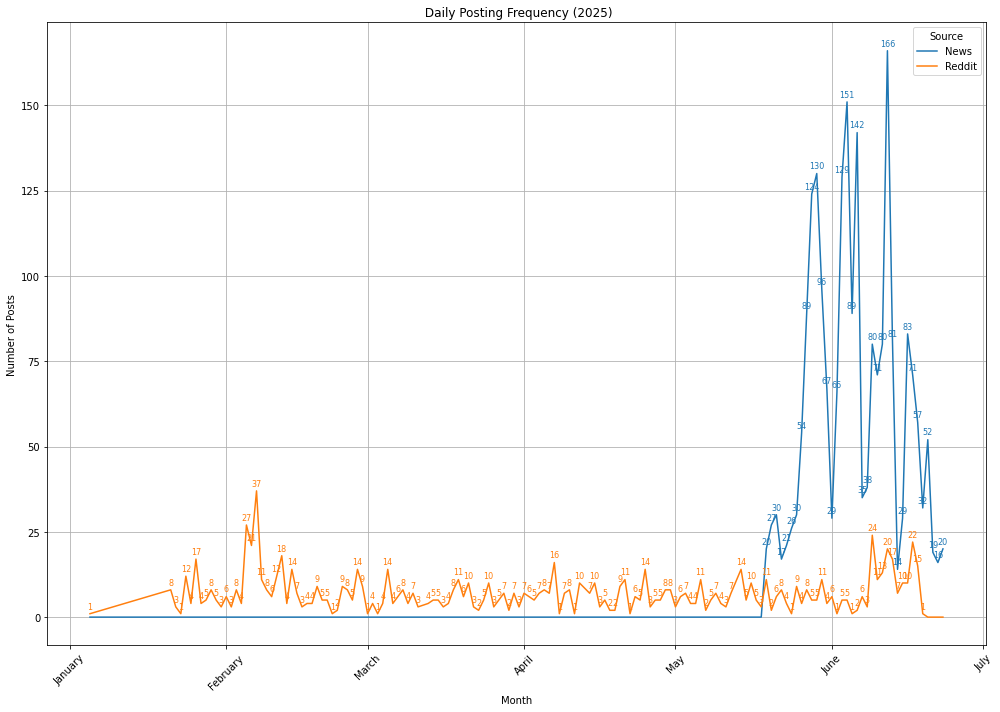

In [102]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Group by date and source
daily_counts = combined_df.groupby(
    [combined_df['published_date'].dt.date, 'source']
).size().unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
lines = daily_counts.plot(kind='line', ax=ax)

# Title and labels
ax.set_title(' Daily Posting Frequency (2025)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Posts')
ax.grid(True)
ax.legend(title='Source')

# Format x-axis to show month names
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.xticks(rotation=45)

# Annotate counts
for line in lines.get_lines():
    data = line.get_xydata()
    for x, y in data:
        if y > 0:
            ax.annotate(
                f'{int(y)}',
                (x, y),
                textcoords="offset points",
                xytext=(0, 5),
                ha='center',
                fontsize=8,
                color=line.get_color()
            )

plt.tight_layout()
plt.show()


Observations and Insights

To be updated here!!!!!!!!!!!!!!!!!!!!!!






#### Weekly Posting Fequency

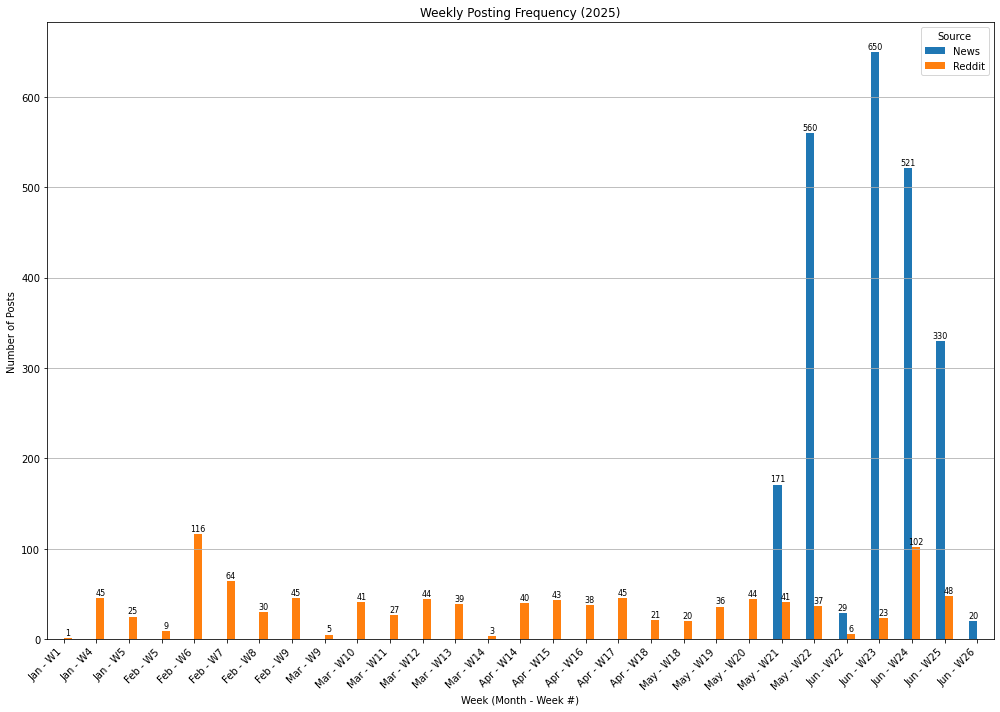

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

combined_df_2025 = combined_df[combined_df['published_date'].dt.year == 2025].copy()


# Get week number and month name
combined_df_2025['week_number'] = combined_df_2025['published_date'].dt.isocalendar().week
combined_df_2025['month_name'] = combined_df_2025['published_date'].dt.strftime('%b')

# Combine month and week number
combined_df_2025['month_week_label'] = combined_df_2025['month_name'] + ' - W' + combined_df_2025['week_number'].astype(str)

# Group by week and source
weekly_counts = combined_df_2025.groupby(['month_week_label', 'source']).size().unstack(fill_value=0)

# Sort the index by actual week number
combined_df_2025['week_order'] = combined_df_2025['published_date'].dt.isocalendar().week
order = combined_df_2025.drop_duplicates('month_week_label').sort_values('week_order')['month_week_label']
weekly_counts = weekly_counts.reindex(order)

# Plot
ax = weekly_counts.plot(kind='bar', figsize=(14, 10))

plt.title('Weekly Posting Frequency (2025)')
plt.xlabel('Week (Month - Week #)')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend(title='Source')
plt.tight_layout()

# Annotate bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords='offset points',
                        ha='center',
                        fontsize=8)

plt.show()


Observations and Insights

To be updated here!!!!!!!!!!!!!!!!!!!!!!






#### Monthly Posting Frequency

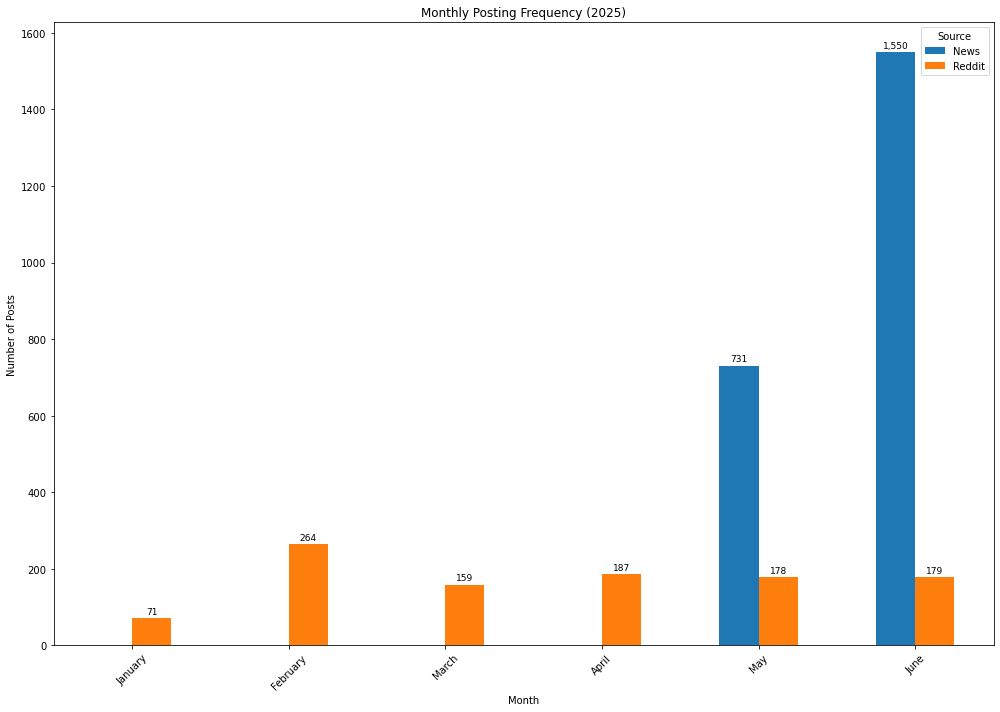

In [104]:
import matplotlib.pyplot as plt

# Group by month and source
monthly_counts = combined_df.groupby(
    [combined_df['published_date'].dt.to_period('M'), 'source']
).size().unstack(fill_value=0)


monthly_counts.index = monthly_counts.index.to_timestamp()

# Create plot
ax = monthly_counts.plot(kind='bar', figsize=(14, 10))

# Format x-axis labels to show month names only
ax.set_xticklabels([d.strftime('%B') for d in monthly_counts.index])

# Annotate each bar
for container in ax.containers:
    ax.bar_label(container, 
                 label_type='edge', 
                 padding=2,
                 fontsize=9,
                 color='black',
                 labels=[f'{v:,.0f}' if v > 0 else '' for v in container.datavalues])


# Plot
plt.title('Monthly Posting Frequency (2025)')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.legend(title='Source')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observations and Insights

To be updated here!!!!!!!!!!!!!!!!!!!!!!






### 2. Text Content Exploration

Unigrams = single-word tokens

Bigrams = 2-word tokens

Trigrams = 3-word tokens

### Most common words and phrases

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


def get_top_ngrams(corpus, ngram_range=(1, 1), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# top 10 for each
top_n = 10

# News Data
print("\n🔹 News Unigrams:")
print(get_top_ngrams(news_df['cleaned_text'], (1,1), top_n))

print("\n🔹 News Bigrams:")
print(get_top_ngrams(news_df['cleaned_text'], (2,2), top_n))

print("\n🔹 News Trigrams:")
print(get_top_ngrams(news_df['cleaned_text'], (3,3), top_n))

# Reddit Data
print("\n🔸 Reddit Unigrams:")
print(get_top_ngrams(reddit_df['cleaned_text'], (1,1), top_n))

print("\n🔸 Reddit Bigrams:")
print(get_top_ngrams(reddit_df['cleaned_text'], (2,2), top_n))

print("\n🔸 Reddit Trigrams:")
print(get_top_ngrams(reddit_df['cleaned_text'], (3,3), top_n))



🔹 News Unigrams:
[('trump', 1472), ('aid', 749), ('cuts', 706), ('president', 629), ('musk', 625), ('house', 589), ('funding', 531), ('donald', 513), ('elon', 475), ('new', 443)]

🔹 News Bigrams:
[('elon musk', 406), ('donald trump', 346), ('president donald', 336), ('trump administration', 278), ('foreign aid', 214), ('white house', 212), ('united states', 160), ('donald trumps', 142), ('public broadcasting', 128), ('big beautiful', 121)]

🔹 News Trigrams:
[('president donald trump', 198), ('president donald trumps', 122), ('department government efficiency', 59), ('agency international development', 48), ('propublica nonprofit newsroom', 47), ('nonprofit newsroom investigates', 47), ('newsroom investigates abuses', 47), ('investigates abuses power', 47), ('abuses power sign', 47), ('receive biggest stories', 47)]

🔸 Reddit Unigrams:
[('kenya', 840), ('like', 817), ('people', 687), ('country', 491), ('usaid', 461), ('africa', 412), ('foreign', 401), ('kenyan', 397), ('know', 391), ('

In [106]:
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(se

### Stopword Frequency

News Stopwords:
the     8024
to      4510
of      3704
a       3467
in      3370
and     3149
for     1667
on      1654
is      1593
that    1157
dtype: int64

Reddit Stopwords:
like       812
get        393
would      365
also       309
could      230
since      167
however     81
ever        80
there       80
else        52
dtype: int64


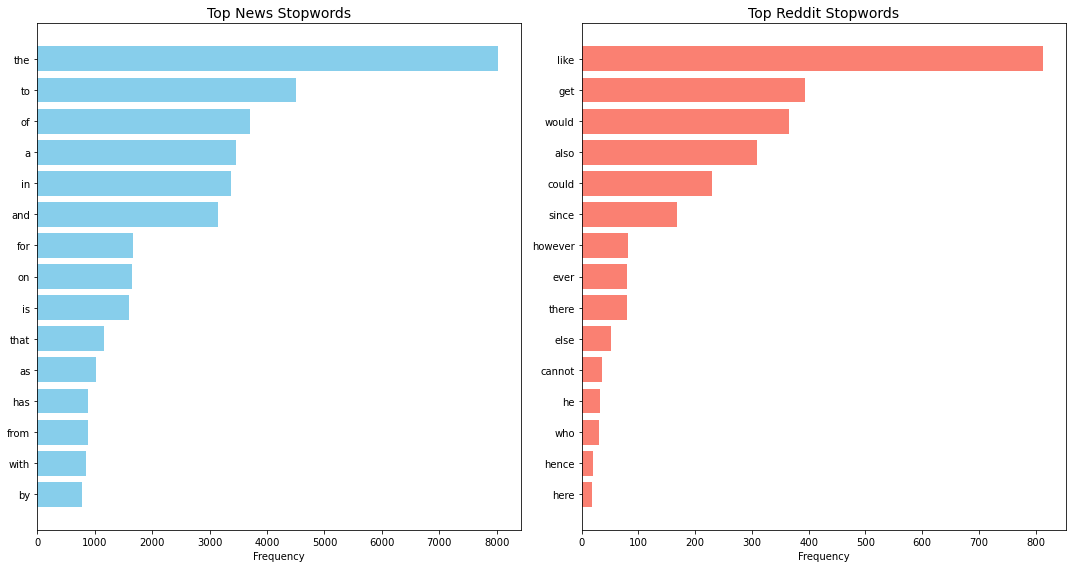


🧾 News Stopword Ratio: 34.6%
🧾 Reddit Stopword Ratio: 2.1%


In [108]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from wordcloud import STOPWORDS



#  Count stopwords
def count_stopwords(text_series):
    stopword_list = set(STOPWORDS)
    all_words = ' '.join(text_series.dropna()).split()
    stopword_counts = Counter(word for word in all_words if word.lower() in stopword_list)
    return pd.Series(stopword_counts).sort_values(ascending=False)

# Compute stopword ratios
def stopword_ratio(text_series):
    all_words = ' '.join(text_series.dropna()).split()
    total_words = len(all_words)
    stopword_count = sum(1 for word in all_words if word.lower() in STOPWORDS)
    return 100 * stopword_count / total_words if total_words > 0 else 0

# Get counts and ratios
news_top_stopwords = count_stopwords(news_df['cleaned_text'])
reddit_top_stopwords = count_stopwords(reddit_df['cleaned_text'])

news_ratio = stopword_ratio(news_df['cleaned_text'])
reddit_ratio = stopword_ratio(reddit_df['cleaned_text'])

# Plotting 
def plot_stopword_comparison(news_stops, reddit_stops, top_n=15):
    plt.figure(figsize=(15, 8))
    
    news_top = news_stops.head(top_n)
    reddit_top = reddit_stops.head(top_n)
    
    ax1 = plt.subplot(1, 2, 1)
    ax1.barh(news_top.index[::-1], news_top.values[::-1], color='skyblue')
    ax1.set_title('Top News Stopwords', fontsize=14)
    ax1.set_xlabel('Frequency')
    
    ax2 = plt.subplot(1, 2, 2)
    ax2.barh(reddit_top.index[::-1], reddit_top.values[::-1], color='salmon')
    ax2.set_title('Top Reddit Stopwords', fontsize=14)
    ax2.set_xlabel('Frequency')
    
    plt.tight_layout()
    plt.show()

#Display
print("News Stopwords:")
print(news_top_stopwords.head(10))
print("\nReddit Stopwords:")
print(reddit_top_stopwords.head(10))

plot_stopword_comparison(news_top_stopwords, reddit_top_stopwords)

print(f"\n News Stopword Ratio: {news_ratio:.1f}%")
print(f" Reddit Stopword Ratio: {reddit_ratio:.1f}%")


News Stopword Ratio: 34.6%
    
This means that 34.6% of all the words in your news articles are stopwords.

Reddit Stopword Ratio: 2.1%
    
Only 2.1% of words in your Reddit posts/comments are stopwords.